<a href="https://www.kaggle.com/code/matthewchuang/predicting-house-prices-with-machine-learning-knn?scriptVersionId=146858765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis and Predicting Californian Housing Prices Using Supervised Machine Learning(KNN)
## Created on 9/03/23 By Matthew Chuang
This dataset was obtained through Kaggle: 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

The data was collected through a 1990 California housing census. 

Introduction: This data analysis and prediction model was designed by me to be an introductory case study using basic statistical knowledge and regression. Throughout this notebook, I will be analyzing the relationships between variables, cleaning data, and lastly using KNN regression to model Californian house prices. Please keep in mind that this data was gathered in 1990 and the numbers are not an accurate representation of the houses in California today. 

In [1]:
#Import important modules:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import random
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.simplefilter("ignore")

Take a look at the data:

In [2]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

print(df.head())
print(df.shape)

#statistics of each column: (this is to see what I can use as a predictor variable)
df.describe()



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


By skimming the Data, I observed that the column total_bedrooms had a lot of missing values.
To solve this issue, I replaced the empty values with the mean, as to not skew the data.


## Cleaning the Data:


In [3]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
#make sure theres no empty boxes
print(df.isna().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Geographical Analysis Using Latitude, Longitude vs Median_house_values

In [4]:
geomap = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', color = 'median_house_value', mapbox_style = 'open-street-map', hover_name = 'population', hover_data = ['median_house_value'], width = 1000, height = 1000)
geomap.show()

From this graph, I can see that properties near the coast of California (especially near San Francisco and Los Angeles) have the highest median house values. Properties more inwards near the mountain ranges have a median house value closer to 50-100k. 


Since we have multiple categorical variables within "Ocean Proximity", I will use one-hot encoding and confirm the relationship with the R-squared values. 

In [5]:
#separate response and predictors
x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

print(df.dtypes)
#Either true, or false for ocean_proximity

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)

#Will create two models, one with only numeric, the other without and compare the R-squared values


#Model 1:
#fitting the linreg model using only numeric values
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
model = LinearRegression().fit(x_train[numeric_features], y_train)
trainscore = model.score(x_train[numeric_features], y_train)
testscore = model.score(x_test[numeric_features], y_test)
print("Model 1(R^2):", trainscore, testscore)


#Model 2
#create dummy variables for categorical (assign binary to boolean)
x_train_new = pd.get_dummies(x_train, drop_first=True)
x_test_new = pd.get_dummies(x_test, drop_first = True)
x_train_new.dtypes

model2 = LinearRegression().fit(x_train_new, y_train)
trainscore = model2.score(x_train_new, y_train)
testscore = model2.score(x_test_new, y_test)
print("Model 2(R^2):", trainscore, testscore)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Model 1(R^2): 0.637134400061633 0.6326488025346999
Model 2(R^2): 0.6462960419199757 0.6433808388317939


The second model has a slightly better R-squared value than model 1, indicating that the categorical variable improved the fitting of the model. These models are fairly good, however there is still room for improvement. I will be possibly looking at the linear relationship between other variables and median_house_value, adding more features, or checking for collinearity. 

Furthermore, there is only a slight improvement in the R-squared values. However when looking at the geomap, we can see that the geographical location and the proximity to the Ocean has a significant impact on the housing which should signify a decent improvement in R-squared values. 

## Determining Outliers

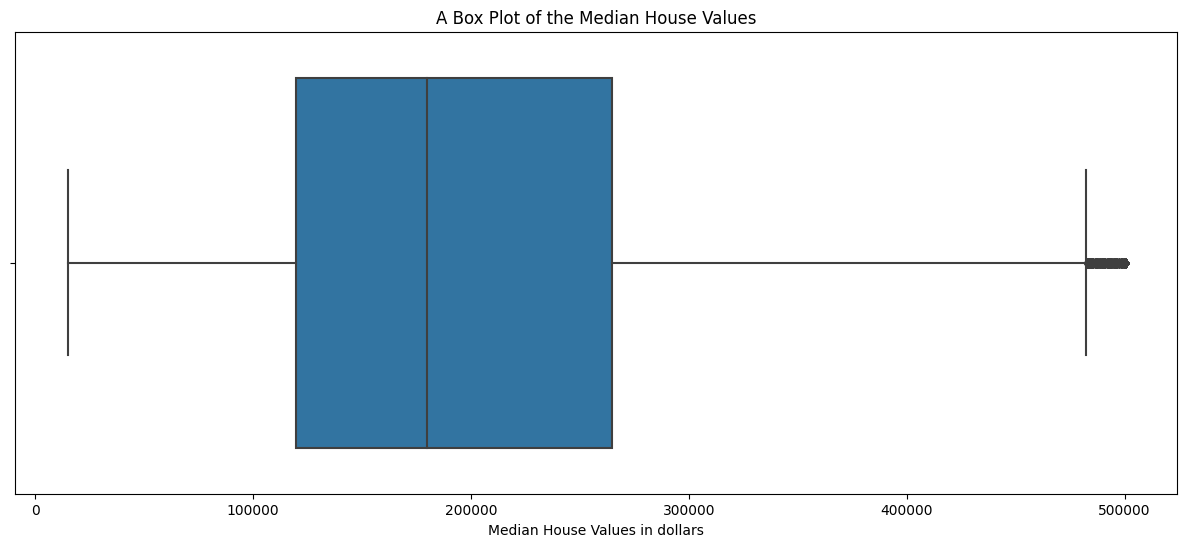

In [6]:
plt.figure(figsize=(15, 6))
sns.boxplot(data = df, x = 'median_house_value')
plt.title('A Box Plot of the Median House Values')
plt.xlabel('Median House Values in dollars')
plt.show()

Although we can see by this boxplot that there might be some outliers around the $500,000 range, I will use residuals to effectively identify them from our dataset. Residuals are defined as the difference between actual and predicted values, and by using standardized residuals (or z-scores) outliers can be identified if they are more than three standard deviations away from the mean. 

In [7]:
upper_limit = df['median_house_value'].mean() + 3*(df['median_house_value'].std())
lower_limit = df['median_house_value'].mean() - 3*(df['median_house_value'].std())
newdf = df.loc[(df['median_house_value'] < upper_limit) | df['median_house_value'] > lower_limit]
print('The number of outliers: ', len(df) - len(newdf))


The number of outliers:  0


By creating a new dataframe that holds acceptable values between the upper limit and lower limit, it seems that there are no outliers within this dataset. 

## Correlation Coefficients: (picking a predictor variable to perform regression)

In [8]:
df = df.drop(columns=['ocean_proximity'])
corr_func = df.corr()
#set our response variable to ascending order
predictor_correlation = corr_func['median_house_value'].sort_values(ascending = False)
print(predictor_correlation)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


From the correlation coefficients, I can see that median_income is the closest to one.

## Predicting House Prices with KNN:

I performed KNN regression on this dataset of housing prices as a baseline model. The main reason that I chose KNN regression to predict/analyze house values is because of the local relationships between houses/data points. In a given area, the prices of houses will roughly be similar to other houses in close proximity.K-Nearest-Neighbor regression determines a set number of values that are within a certain distance to a new point and predicts a new value as the mean of the point's neighbors.  
This will give me an idea of the relationship between variables and be able to predict housing price. Although I know that ocean_proximity does affect our model, I want to explore the relationships between different variables.
Because of the size of this data set, I will be using a train_test_split with a test size of 40% and a train size of 60%. To ensure reproducibility, we will be using a random_state.
In order to ensure good visibility in my KNN regression line, I will be taking a sample of a little less than 10% of the total population. (2000)

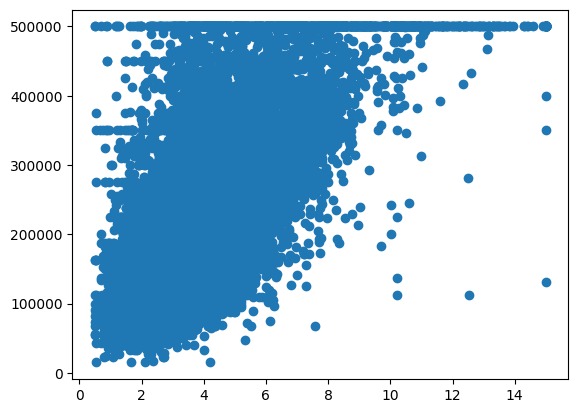

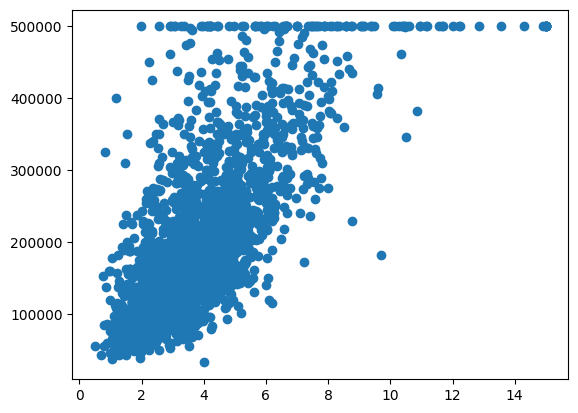

In [9]:
#predictor (x) variable: I picked median_income because of its correlation coeficient
x = df[['median_income']]

#response (y) variable:
y = df['median_house_value']

plt.scatter(x,y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)

sample_size = 2000
indices = random.sample(range(len(x_train)), sample_size)
x_randomed = x_train.iloc[indices]
y_randomed = y_train.iloc[indices]

plt.scatter(x_randomed, y_randomed)
plt.show()


Let us now see how well the KNN Regression Line fits against the data. We will be using three different k values to see which line is most effective and to confirm our findings from the MSE values. Because of the vastness of the dataset, I will be taking a random sample of 2000 (a little less than 10% of the data points). 

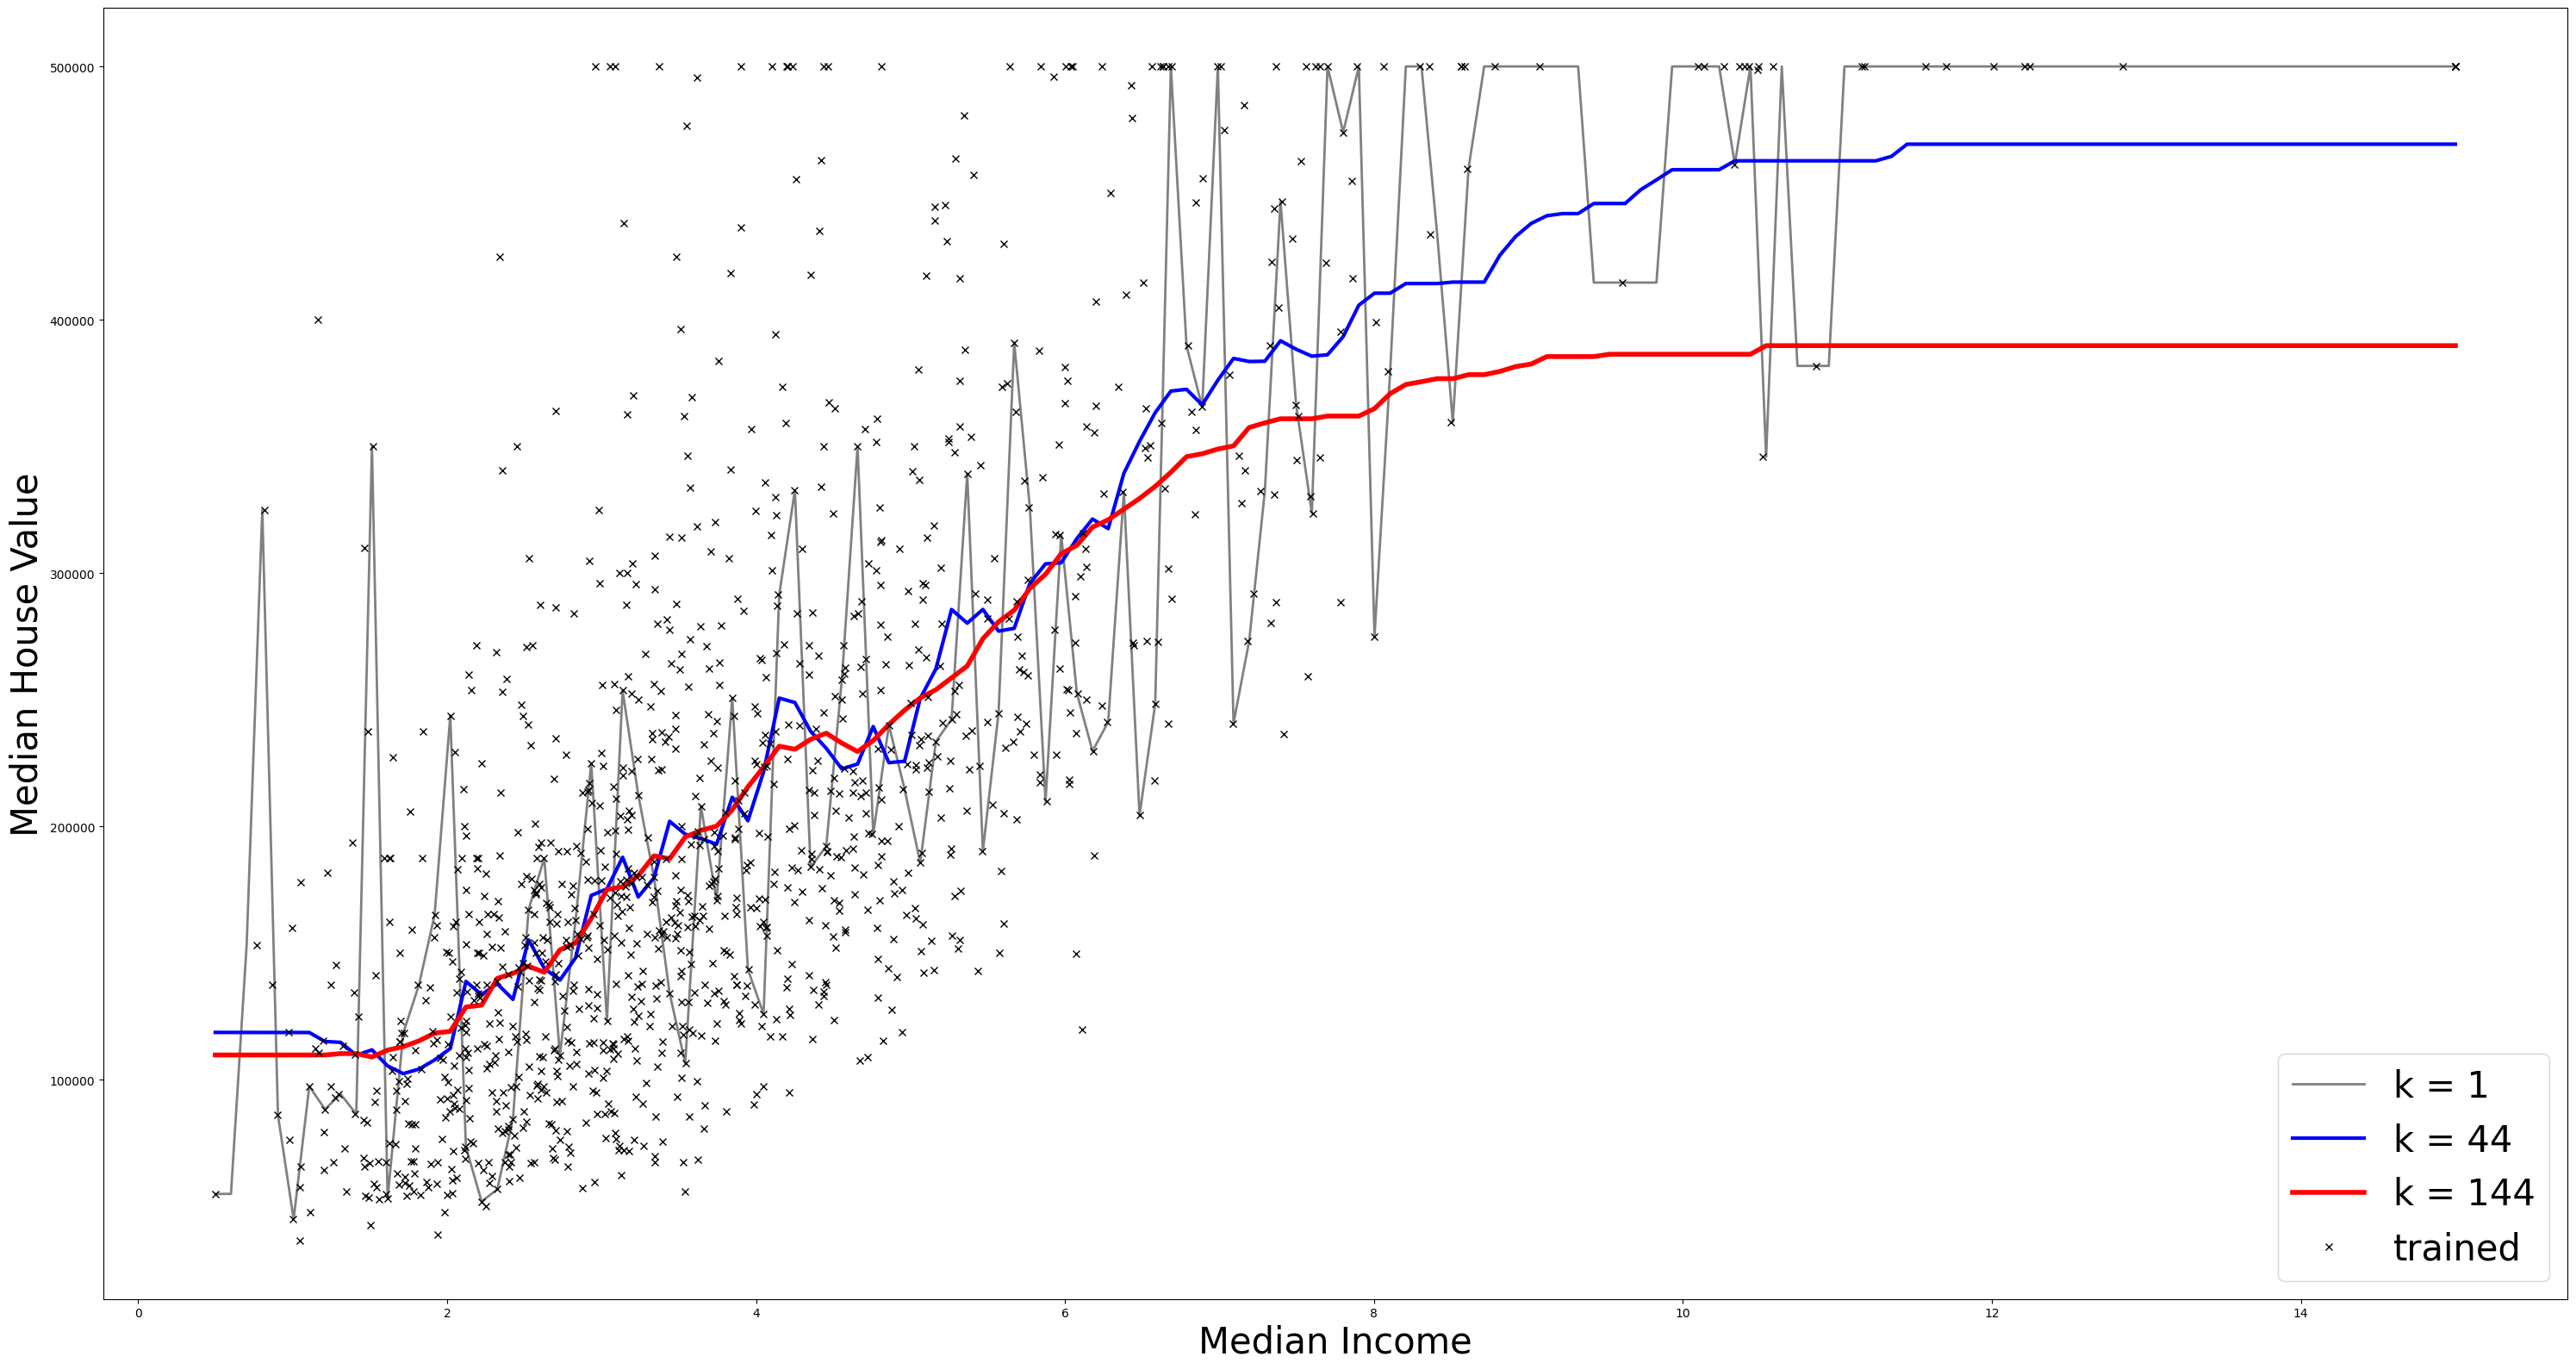

In [10]:

x_train, x_test, y_train, y_test = train_test_split(x_randomed, y_randomed, test_size = 0.4, random_state = 21)
#I chose a K-value of 144 as the max because it is the square root of the total population
k_list = np.linspace(1, 144, 144)

fig, ax = plt.subplots(figsize=(30,16))
k_dict = {}
i = 0 
#loop through out k list
for k in k_list:
    model=KNeighborsRegressor(n_neighbors=int(k))
    #train our model
    model.fit(x_train, y_train)

    #fit model with test data
    y_pred = model.predict(x_test)
    color = ['gray', 'blue', 'red']
    if k in [1, 44, 144]:
        xnew = np.linspace(x_randomed.min(), x_randomed.max(), 144)
        ynew = model.predict(xnew)
        ax.plot(xnew, ynew, '-', label = f'k = {int(k)}', linewidth = i+2, color = color[i])
        i+=1
    #storing MSE values
    MSE = mean_squared_error(y_test, y_pred)
    k_dict[k] = MSE 

ax.plot(x_train, y_train, 'x', label ='trained', color='k')
ax.set_xlabel('Median Income', fontsize = 30)
ax.set_ylabel('Median House Value', fontsize = 30)
plt.tight_layout()
ax.legend (loc = 'lower right', fontsize = 30)
plt.show()


From this graph, it is hard to tell which k value will be more efficient in predicting values. However, I can conclude that when K is 144, it is more resistant to outliers and describes the general trend of the trained values smoothly. I will now confirm this with mean squared error values. 

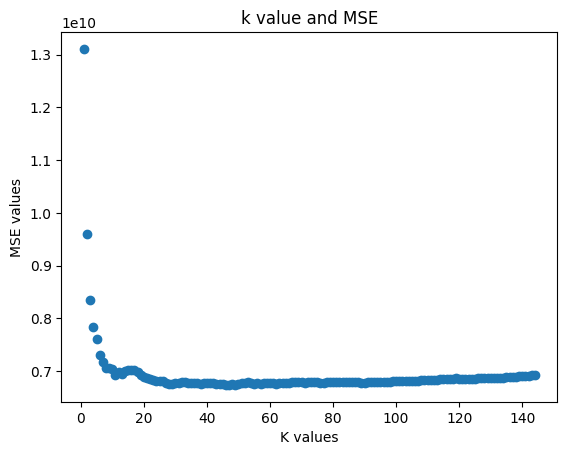

In [11]:

#Making sure there is a relationship between our K-values and MSE that corresponds to it
plt.scatter(list(k_dict.keys()),list(k_dict.values()))
plt.xlabel('K values')
plt.ylabel('MSE values')
plt.title('k value and MSE')
plt.show()

From this graph, it is clear that the highest K-value will give us a lower MSE value. 


In [12]:
r2 = r2_score(y_test, y_pred)
print(r2)


0.4953986481943491


An R-squared value of 0.47 indicates that about 47% of the variance within the response variable can be explained by the predictor variable. This suggests a moderate level of association between median income and median house value. It is important to note that this R-squared value by itself doesn't provide enough information of the relationship between these two variables and that the correlation we found earlier does not always imply causation.

## Conclusion

In this exploratory analysis, I explored the California housing dataset in order to predict median housing prices using KNN regression. 

By cleaning the dataset, I addressed missing values and identified the strongest correlators to the median house value using geographical analysis as well as correlation coefficients. 

One significant question that I had was if there was any collinearity between the predictor variables that might have led to ocean_proximity not changing the r-squared values as much as it did. Furthermore, the boxplot of median house values clearly showed some outliers past the maximum. However on further inspection with z-scores, there were no outliers. 

The KNN regression prediction model was moderately successful as it depicted a somewhat positive relationship between our predictor and response variable. However, I will be considering adding more measures of accuracy and different prediction models with a variety of other variables to see if there is a stronger model performance. 